In [59]:
import pandas as pd
import numpy as np

In [60]:
nf = pd.read_csv('./dataset/netflix_titles.csv')

nf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [61]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 1-1. 한국 작품은 총 얼마나 있는가?

In [62]:
len(nf[nf['country'] == 'South Korea'])

183

### 1-2. 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?

- country column을 기준으로 한다.
- **단일 국가**인 경우를 기준으로 결과를 구해보자.

In [63]:
nf_ctry = nf.groupby('country').count()['show_id']

print(nf_ctry.idxmax(), nf_ctry[nf_ctry.idxmax()])

United States 2555


## 2-1. 비트코인 가격 그래프

In [64]:
bc = pd.read_csv('./dataset/BitCoin.csv')

bc

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000
...,...,...,...,...,...,...,...,...
1604,1604,2013-02-05,116.38,125.60,92.28,105.21,6.722784e+06,1292190000
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8.312655e+06,1597780000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7.757951e+06,1491160000


In [65]:
# 타입 확인
bc.dtypes

Unnamed: 0      int64
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap      int64
dtype: object

In [66]:
# 날짜 순으로 정렬
bc = bc.sort_values(by=['Date'], ignore_index=True)

bc

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1,1574,2013-01-06,128.81,129.78,127.20,129.30,7.521960e+06,1445800000
2,1544,2013-01-07,97.51,97.66,86.30,88.05,5.759986e+06,1107130000
3,1513,2013-01-08,106.21,108.00,103.01,104.00,6.348195e+06,1220190000
4,1482,2013-01-09,135.14,145.81,134.81,138.34,8.179728e+06,1572230000
...,...,...,...,...,...,...,...,...
1604,133,2017-12-05,1845.76,1856.15,1694.01,1724.24,7.409840e+08,30131100000
1605,102,2017-12-06,2953.22,2997.26,2518.56,2659.63,2.569530e+09,48391200000
1606,72,2017-12-07,2332.77,2423.71,2275.14,2398.84,1.117410e+09,38355900000
1607,41,2017-12-08,3650.63,3949.92,3613.70,3884.71,2.219590e+09,60242100000


In [67]:
# 기간 확인
bc[(bc['Date'] < '2017-06') & ('2016-06' < bc['Date'])]

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
1130,625,2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000
1131,594,2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000
1132,565,2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000
1133,534,2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000
1134,504,2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000
...,...,...,...,...,...,...,...,...
1475,118,2017-05-27,2196.27,2260.20,1855.83,2038.87,1.700480e+09,35917100000
1476,117,2017-05-28,2054.08,2267.34,2054.08,2155.80,1.147140e+09,33595900000
1477,116,2017-05-29,2159.43,2307.05,2107.17,2255.61,9.946250e+08,35323500000
1478,115,2017-05-30,2255.36,2301.96,2124.57,2175.47,1.443970e+09,36897000000


5일 평균선 그리기

In [68]:
col = bc['Open']
added = pd.Series([0]*len(col))

for i in range(1, 5):
    added += pd.Series([0]*i).append(col[:-i], ignore_index=True)

print(col + added)

0         139.00
1         267.81
2         365.32
3         471.53
4         606.67
          ...   
1604     6005.89
1605     8183.93
1606     9513.18
1607    11987.19
1608    14951.26
Length: 1609, dtype: float64


In [69]:
ma5 = col + added

for i in range(5):
    ma5[i] = ma5[i]/(i+1)
for i in range(5, len(col)):
    ma5[i] = ma5[i]/5

ma5

0        139.000000
1        133.905000
2        121.773333
3        117.882500
4        121.334000
           ...     
1604    1201.178000
1605    1636.786000
1606    1902.636000
1607    2397.438000
1608    2990.252000
Length: 1609, dtype: float64

In [70]:
bc['MA5'] = ma5

bc.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap', 'MA5'],
      dtype='object')

In [85]:
# 기간 픽
bc_term = bc[(bc['Date'] < '2017-06') & ('2016-06' < bc['Date'])]

bc_term = bc_term.reset_index()

그래프 그리기

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

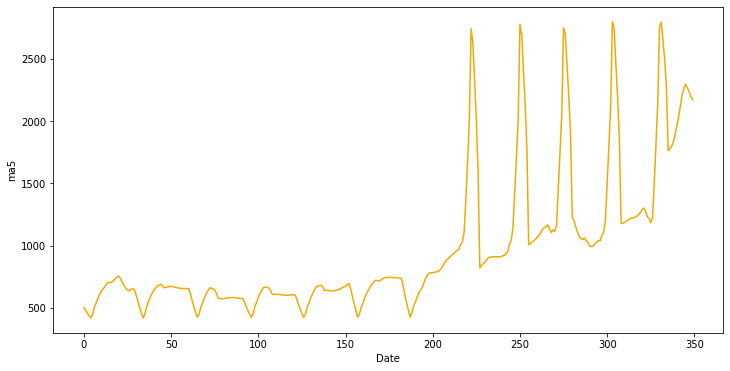

In [73]:
x = range(len(bc_term['MA5']))
y = bc_term['MA5']

plt.figure(figsize=(12, 6))

plt.plot(x, y, color='#f2a900')

plt.xlabel('Date')
plt.ylabel('ma5')

plt.show()


## 그래프 확장

In [74]:
import mpl_finance
import matplotlib.ticker as ticker

In [89]:
ma20 = bc_term['Open'].rolling(window=20).mean()
bc_term["MA20"] = ma20


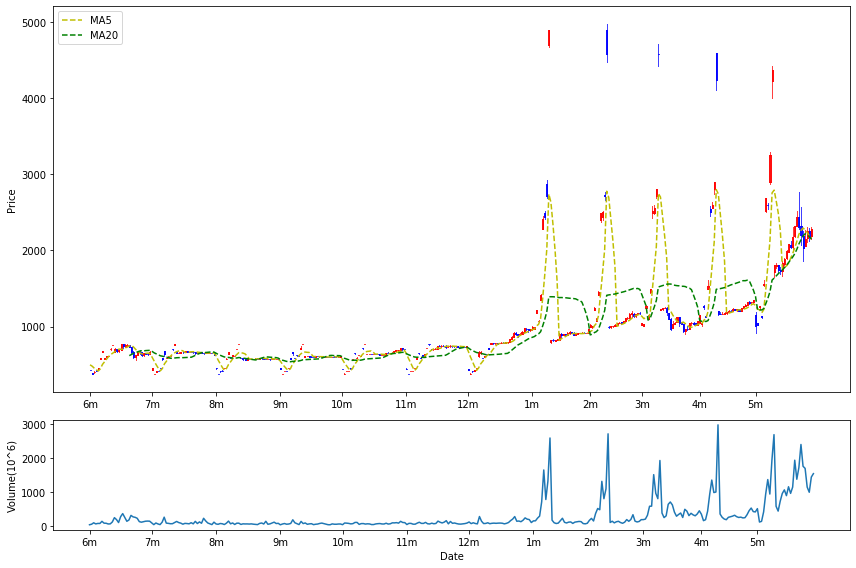

In [88]:
fig = plt.figure(figsize=(12, 8))

# 구획 나누기
top_axes = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

day_list = []
name_list = []

for i, day in enumerate(bc_term['Date']):
    if day[-2:] == '01':
        day_list.append(i)
        name_list.append(str(int(day[5:7])) + 'm')

# x axis 눈금
top_axes.xaxis.set_major_locator(ticker.FixedLocator(day_list))
top_axes.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))
bottom_axes.xaxis.set_major_locator(ticker.FixedLocator(day_list))
bottom_axes.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

# 가격 차트
mpl_finance.candlestick2_ohlc(top_axes, bc_term['Open'], bc_term['High'], bc_term['Low'], bc_term['Close'], width=0.5, colorup='r', colordown='b')
top_axes.plot(bc_term.index, bc_term['MA5'], 'y--', label="MA5")
top_axes.plot(bc_term.index, bc_term['MA20'], 'g--', label="MA20")

top_axes.legend(loc='upper left')
top_axes.set_ylabel('Price')

# 거래량 차트
bottom_axes.plot(bc_term['Volume']/1e6)
bottom_axes.set_ylabel('Volume(10^6)')

plt.xlabel('Date')

plt.tight_layout()
plt.show()